In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [7]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
homes = pd.read_csv("homeprices.applied.econ.csv")
homes.head(10)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no
5,45000.0,3500,2,1,1,no,no,yes,no,no,0,no
6,61700.0,4032,2,1,1,yes,no,yes,no,no,0,no
7,54500.0,3150,2,2,1,no,no,yes,no,no,0,no
8,66500.0,3745,3,1,2,yes,no,yes,no,no,0,no
9,44000.0,2160,3,1,2,no,no,yes,no,no,0,no


<IPython.core.display.Javascript object>

In [4]:
homes_ac = homes[(homes["airco"] == "yes")]
homes_ac.count()

price       173
lotsize     173
bedrooms    173
bathrms     173
stories     173
driveway    173
recroom     173
fullbase    173
gashw       173
airco       173
garagepl    173
prefarea    173
dtype: int64

<IPython.core.display.Javascript object>

In [5]:
homes_no_ac = homes[(homes["airco"] == "no")]
homes_no_ac.count()

price       373
lotsize     373
bedrooms    373
bathrms     373
stories     373
driveway    373
recroom     373
fullbase    373
gashw       373
airco       373
garagepl    373
prefarea    373
dtype: int64

<IPython.core.display.Javascript object>

# Do homes with air conditioning have a higher sales price than homes without air conditioning?

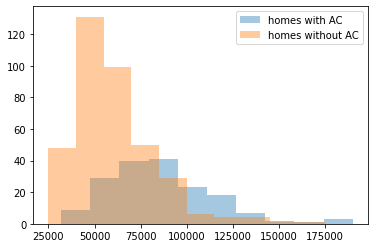

<IPython.core.display.Javascript object>

In [11]:
plt.hist(homes_ac["price"], alpha=0.4, label="homes with AC")
plt.hist(homes_no_ac["price"], alpha=0.4, label="homes without AC")
plt.legend(loc="upper right")
plt.show()

In [12]:
print(stats.describe(homes_ac["price"]))
print(stats.describe(homes_no_ac["price"]))

DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)
DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)


<IPython.core.display.Javascript object>

The histogram and descriptive stats show that the home_no_ac may not be normal enough to continue (look at kurtosis)

# Do homes with a full basement have a higher sales price than homes without a full basement?

In [13]:
homes_bas = homes[(homes["fullbase"] == "yes")]
homes_nbas = homes[(homes["fullbase"] == "no")]

<IPython.core.display.Javascript object>

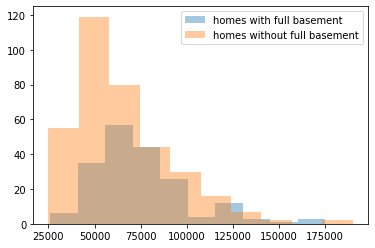

<IPython.core.display.Javascript object>

In [14]:
plt.hist(homes_bas["price"], alpha=0.4, label="homes with full basement")
plt.hist(homes_nbas["price"], alpha=0.4, label="homes without full basement")
plt.legend(loc="upper right")
plt.show()

In [15]:
print(stats.describe(homes_bas["price"]))
print(stats.describe(homes_nbas["price"]))

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)
DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)


<IPython.core.display.Javascript object>

Based on the skewness and kurtosis (Both less than 3), these samples are normal enough to use t-test

In [19]:
stats.ttest_ind(homes_bas["price"], homes_nbas["price"])

Ttest_indResult(statistic=4.420628512286621, pvalue=1.1885626562866786e-05)

<IPython.core.display.Javascript object>

The t statistic is greater than 1.96 which mean we reject the null hypothesis.
The p value is also very small which also mean we reject the null hypothesis.
(The null hypothesis being the first population mean is equal to the second population mean)

In [17]:
# borrowed this function from checkpoint
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt(
        (sample_1_var / sample_1_n) + (sample_2_var / sample_2_n)
    )
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return (
        "The difference in means at the 95% confidence interval (two-tail) is between "
        + str(ci_lower)
        + " and "
        + str(ci_upper)
        + "."
    )

<IPython.core.display.Javascript object>

In [20]:
get_95_ci(homes_nbas["price"], homes_bas["price"])

'The difference in means at the 95% confidence interval (two-tail) is between 5801.544262762097 and 15032.294775656886.'

<IPython.core.display.Javascript object>

We can interpret this result as saying that with 95% confidence, houses without full basements prices on average between $5,801.54 and $15,032.29 lower than houses with basements.